## 1.1广义线性模型

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


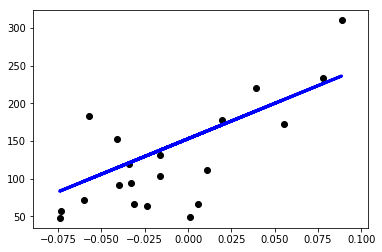

In [10]:
#线性回归使用
#url:http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
print(__doc__)

%matplotlib inline
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
#print(diabetes)

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# 系数：[  938.23786125 ] 
# 均 方 误差： 2548.07 
# 方差 分数： 0.47

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()
# 1.1.1.1。普通最小二乘复杂

# 该方法使用X的奇异值分解来计算最小二乘解。如果X是大小（n，p）的矩阵，则该方法具有O（NP ^ 2）假设的成本n >= p。

## 1.1岭回归
#### Ridge回归通过对系数的大小施加惩罚来解决普通最小二乘的一些问题 。

Automatically created module for IPython interactive environment
[[ 1.          0.5         0.33333333  0.25        0.2         0.16666667
   0.14285714  0.125       0.11111111  0.1       ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667  0.14285714
   0.125       0.11111111  0.1         0.09090909]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714  0.125
   0.11111111  0.1         0.09090909  0.08333333]
 [ 0.25        0.2         0.16666667  0.14285714  0.125       0.11111111
   0.1         0.09090909  0.08333333  0.07692308]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111  0.1
   0.09090909  0.08333333  0.07692308  0.07142857]
 [ 0.16666667  0.14285714  0.125       0.11111111  0.1         0.09090909
   0.08333333  0.07692308  0.07142857  0.06666667]
 [ 0.14285714  0.125       0.11111111  0.1         0.09090909  0.08333333
   0.07692308  0.07142857  0.06666667  0.0625    ]
 [ 0.125       0.11111111  0.1         0.09090909  0.08333333  0.0769230

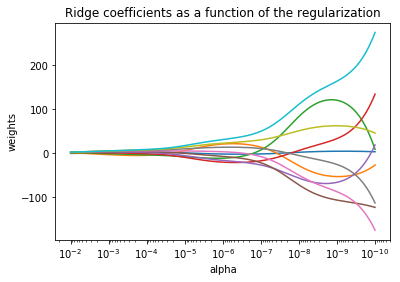

In [14]:
# from sklearn import linear_model
# reg = linear_model.Ridge (alpha = .5)
# reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
# print(reg.coef_)
# print(reg.intercept_) 
# 绘制凸度系数作为正则化的函数
# 显示共线性对估计器系数的影响。
# Ridge回归是本例中使用的估计量。每个颜色代表系数向量的不同特征，并且这被显示为正则化参数的函数。
# 本例还显示了将Ridge回归应用于高度病态矩阵的有用性。对于这种矩阵，目标变量的轻微变化可能导致计算权重的巨大差异。在这种情况下，设置一定的正则化（alpha）以减少这种变化（噪声）是有用的。
# 当α非常大时，正则化效应支配平方丢失函数，系数趋于零。在路径的最后，由于α趋于零，解决方案趋向于普通的最小二乘法，所以系数呈现大的振荡。在实践中，有必要调整alpha，以保持两者之间的平衡。
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
# X是10×10希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print(X)#,y,alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()